# Iris 데이터의 class, sl, sw ,pw로 pl의 회귀식 구하기

In [39]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [40]:
iris = load_iris()

In [41]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [42]:
df['class'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 시각화

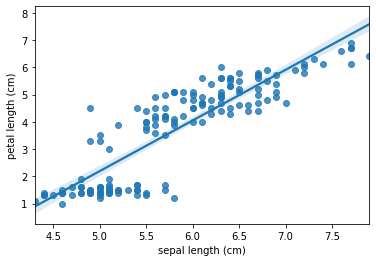

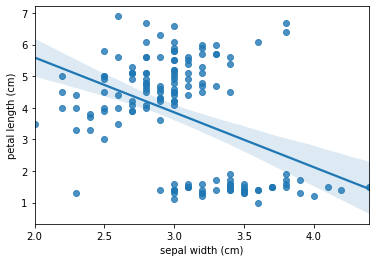

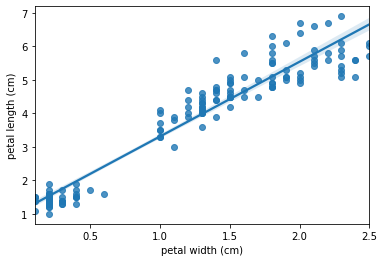

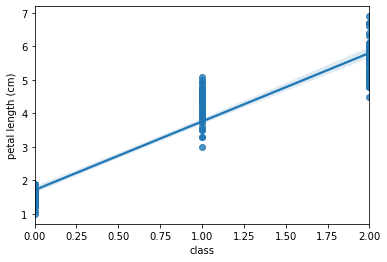

In [43]:
lm_features = df.drop('petal length (cm)',axis=1).columns
for feature in lm_features:
    sns.regplot(x=feature, y='petal length (cm)', data=df)
    plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
# X에는 pl을 제외한 모든 칼럼, y에는 pl만
X = df.iloc[:,[0,1,3,4]].values
y = df.iloc[:,2].values

### 테스트셋 분리

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size = 0.2, random_state =2021
)

### 회귀 모델

In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f'MSE: {mse:.2f}, RMSE: {np.sqrt(mse):.2f}, R_squared: {r2:.4f}')

MSE: 0.10, RMSE: 0.31, R_squared: 0.9682


In [48]:
print('계수: ', lr.coef_)

계수:  [ 0.68227323 -0.51925158  1.11668415  0.37500635]


In [49]:
print('y절편: ',lr.intercept_)

y절편:  -0.36699949396033293


## 회귀식
### pl = 0.68*sl - 0.51*sw + 1.11*pw + 0.37*class -0.36

### cross_val_score로 pl 교차 검증

In [50]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
# 5 폴드 세트로 MSE를 구함
neg_maen_score = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-neg_maen_score)
avg_rmse = np.average(rmse_scores)

print('개별 MSE:', np.round(neg_maen_score,2))
print('개별 RMSE:', np.round(rmse_scores,2))
print(f'평균 RMSE: {avg_rmse:.4f}')

개별 MSE: [-0.06 -0.08 -0.14 -0.1  -0.21]
개별 RMSE: [0.25 0.28 0.38 0.32 0.46]
평균 RMSE: 0.3387


# Iris 데이터의 class, sl, sw ,pl로 pw의 회귀식 구하기

In [51]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [52]:
# X에는 pw을 제외한 모든 칼럼, y에는 pw만
X = df.iloc[:,[0,1,2,4]].values
y = df.iloc[:,3].values

### 테스트 셋 분리

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size = 0.2, random_state =2021
)

### 회귀 모델

In [54]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f'MSE: {mse:.2f}, RMSE: {np.sqrt(mse):.2f}, R_squared: {r2:.4f}')

MSE: 0.04, RMSE: 0.19, R_squared: 0.9226


In [55]:
print('계수: ', lr.coef_)

계수:  [-0.12876754  0.17861614  0.32741898  0.37562097]


In [56]:
print('y절편: ',lr.intercept_)

y절편:  -0.19445016041642282


## 회귀식
### pw = -0.12*sl + 0.17*pw + 0.32*pl + 0.37*class -0.19

### 교차검증

In [57]:
lr = LinearRegression()
# 5 폴드 세트로 MSE를 구함
neg_maen_score = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-neg_maen_score)
avg_rmse = np.average(rmse_scores)

print('개별 MSE:', np.round(neg_maen_score,2))
print('개별 RMSE:', np.round(rmse_scores,2))
print(f'평균 RMSE: {avg_rmse:.4f}')

개별 MSE: [-0.01 -0.02 -0.02 -0.04 -0.07]
개별 RMSE: [0.09 0.14 0.15 0.19 0.26]
평균 RMSE: 0.1667


# Iris 데이터의 class, sw, pl, pw로 sl의 회귀식 구하기

In [58]:
# X에는 sl을 제외한 모든 칼럼, y에는 sl만
X = df.iloc[:,[1,2,3,4]].values
y = df.iloc[:,0].values

### 테스트 셋 분리

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size = 0.2, random_state =2021
)

### 회귀 모델

In [60]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f'MSE: {mse:.2f}, RMSE: {np.sqrt(mse):.2f}, R_squared: {r2:.4f}')

MSE: 0.07, RMSE: 0.27, R_squared: 0.8808


In [61]:
print('계수: ', lr.coef_)

계수:  [ 0.60733316  0.77406606 -0.49825608 -0.21265098]


In [62]:
print('y절편: ',lr.intercept_)

y절편:  1.904601213368351


## 회귀식
### sl = 0.6*sw + 0.77*pl - 0.49*pw - 0.21class + 1.9

### 교차검증

In [63]:
lr = LinearRegression()
# 5 폴드 세트로 MSE를 구함
neg_maen_score = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-neg_maen_score)
avg_rmse = np.average(rmse_scores)

print('개별 MSE:', np.round(neg_maen_score,2))
print('개별 RMSE:', np.round(rmse_scores,2))
print(f'평균 RMSE: {avg_rmse:.4f}')

개별 MSE: [-0.06 -0.08 -0.14 -0.1  -0.14]
개별 RMSE: [0.25 0.29 0.37 0.31 0.38]
평균 RMSE: 0.3199


# Iris 데이터의 class, sl, pl, pw로 sw의 회귀식 구하기

In [64]:
# X에는 sw을 제외한 모든 칼럼, y에는 sw만
X = df.iloc[:,[0,2,3,4]].values
y = df.iloc[:,1].values

### 테스트 셋 분리

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size = 0.2, random_state =2021
)

### 회귀모델

In [66]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f'MSE: {mse:.2f}, RMSE: {np.sqrt(mse):.2f}, R_squared: {r2:.4f}')

MSE: 0.05, RMSE: 0.22, R_squared: 0.5667


In [67]:
print('계수: ', lr.coef_)

계수:  [ 0.61339502 -0.59499152  0.69803975 -0.12580651]


In [68]:
print('y절편: ',lr.intercept_)

y절편:  0.9976767818176957


## 회귀식
### sw = 0.61*sl - 0.59*pl + 0.69*pw - 0.12class + 0.99

### 교차검증

In [69]:
lr = LinearRegression()
# 5 폴드 세트로 MSE를 구함
neg_maen_score = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-neg_maen_score)
avg_rmse = np.average(rmse_scores)

print('개별 MSE:', np.round(neg_maen_score,2))
print('개별 RMSE:', np.round(rmse_scores,2))
print(f'평균 RMSE: {avg_rmse:.4f}')

개별 MSE: [-0.08 -0.11 -0.16 -0.08 -0.11]
개별 RMSE: [0.28 0.33 0.41 0.29 0.33]
평균 RMSE: 0.3289
